# ESCUELA POLITÉCNICA NACIONAL
## EMG GESTURE ANALYSIS
- Victor Hugo Vimos
- César Aguayo

Realizaremos el análisis estadistico y gráfico de los gestos de la mano registrados
por un brazalete que posee 8 sensores de EMG
 
La base de datos usada corresponde a los gestos de la mano
registrados por una persona (Base de datos propia).

Se distinguen 6 categorias en la columna "activity"
- waveOut
- waveIn
- fist
- pinch
- open
- noGesture

Cada columna WMoos_F5_Ms1 ... WMoos_F5_Ms8 corresponse a la energía de ese sensor
al momento de registar un gesto

Hay 50 repeticiones por cada gesto, con un total de 300 repeticiones, ya que hay 6 gestos.

El brazalete utilizado es el siguiente mostrado en el gráfico:

 ![Myo Arm Band](https://techglimpse.com/wp-content/uploads/2014/07/myo-e1406143549880.jpg)


## Importación de librerías

In [6]:
# Importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carga de la base de datos "DataBase200Corrected"

In [7]:
# Opcion de lectura de datos N 1
# Lectura de datos mediante el uso de una funcion propia 

#def readEmgData(path):
#    try:
#        archivo_abierto = open(path, "r")
#        lineas = archivo_abierto.readlines()
#        for linea in lineas:
#            print(linea)
#    except error:
#       print(error)
#        print(":'( Lei mal el archivo")
#path = "./DataBase200Corrected.csv"
#emgGesturesSecondMode=readEmgData(path)


# ===============================================
# Opcion de lectura de datos N 2
# Lectura de datos mediante el uso de pandas

path = "./DataBase200Corrected.csv"
emgGestures = pd.read_csv(path)
print (emgGestures)

     WMoos_F5_Ms1  WMoos_F5_Ms2  WMoos_F5_Ms3  WMoos_F5_Ms4  WMoos_F5_Ms5  \
0       15.799835     20.895050      3.482697      1.201355      0.560547   
1       17.736023     17.792938      3.647522      1.320618      1.033264   
2       20.695984     20.640320      7.135101      2.431152      1.533081   
3       16.519836     23.637054      4.135712      1.456970      0.866333   
4       21.847046     21.610321      4.969666      1.653229      1.067352   
5       21.252960     18.866028      4.890869      1.540070      0.609100   
6       25.490204     23.024689      5.564636      1.845215      0.820435   
7       18.204712     17.976349      5.218811      1.825897      0.774780   
8       17.536499     19.650635      6.620148      2.297760      1.009308   
9       21.144531     15.813629      3.168427      1.094055      0.457428   
10      20.435425     26.339783      7.430267      2.308319      1.737976   
11      25.023407     22.224854      5.638855      1.812134      0.786407   

## Operaciones básicas de datos

#### Se realiza el análisis con 2 sensores. Sensor 1 "WMoos_F5_Ms1" y el sensor 4 "WMoos_F5_Ms4"

In [8]:
emgSensorOne  = emgGestures['WMoos_F5_Ms1']
emgSensorFour = emgGestures['WMoos_F5_Ms4']
print(type(emgSensorOne))
print(type(emgSensorFour))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#### Impresión de 10 datos de cada sensor

In [9]:
summary=[emgSensorOne[0:10],emgSensorFour[0:10]]
print(summary)

[0    15.799835
1    17.736023
2    20.695984
3    16.519836
4    21.847046
5    21.252960
6    25.490204
7    18.204712
8    17.536499
9    21.144531
Name: WMoos_F5_Ms1, dtype: float64, 0    1.201355
1    1.320618
2    2.431152
3    1.456970
4    1.653229
5    1.540070
6    1.845215
7    1.825897
8    2.297760
9    1.094055
Name: WMoos_F5_Ms4, dtype: float64]


### Valor medio

In [10]:

# Valor medio sensor 1 "WMoos_F5_Ms1" 

# Gesto "WAVEOUT"
Ms1_waveOut        = emgSensorOne[0:50]
Ms1_waveOut_mean   = np.mean(Ms1_waveOut)
print(Ms1_waveOut_mean)

# Gesto "WAVEIN"
Ms1_waveIn        = emgSensorOne[50:100]
Ms1_waveIn_mean   = np.mean(Ms1_waveIn)
print(Ms1_waveIn_mean)

# Gesto "FIST"
Ms1_fist        = emgSensorOne[100:150]
Ms1_fist_mean   = np.mean(Ms1_fist)
print(Ms1_fist_mean)

# Gesto "OPEN"
Ms1_open        = emgSensorOne[150:200]
Ms1_open_mean   = np.mean(Ms1_open )
print(Ms1_open_mean)

# Gesto "PINCH"
Ms1_pinch        = emgSensorOne[200:250]
Ms1_pinch_mean   = np.mean(Ms1_pinch)
print(Ms1_pinch_mean)


# Gesto "NOGESTURE"
Ms1_noGesture        = emgSensorOne[250:300]
Ms1_noGesture_mean   = np.mean(Ms1_noGesture)
print(Ms1_noGesture_mean)
print(type(Ms1_noGesture_mean))

18.832512207199997
2.5056884766199996
3.3360333252200003
11.968095092559999
5.1752136230199985
0.41298156736
<class 'float'>


In [11]:
Ms1_summary=[Ms1_waveOut_mean,Ms1_waveIn_mean,Ms1_fist_mean,Ms1_open_mean,Ms1_pinch_mean,Ms1_noGesture_mean]
print(Ms1_summary)
print(type(Ms1_summary))

[18.832512207199997, 2.5056884766199996, 3.3360333252200003, 11.968095092559999, 5.1752136230199985, 0.41298156736]
<class 'list'>


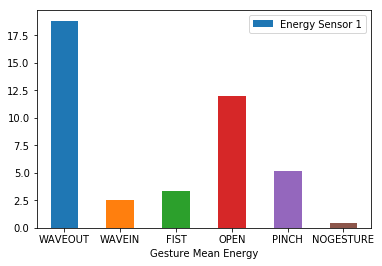

In [28]:
# Gráficas comparativas del valor medio por gesto ene el sensor 1 "WMoos_F5_Ms1" 

df = pd.DataFrame({'Gesture Mean Energy':['WAVEOUT', 'WAVEIN', 'FIST','OPEN','PINCH','NOGESTURE'], 
                   'Energy Sensor 1':Ms1_summary})
ax = df.plot.bar(x='Gesture Mean Energy', y='Energy Sensor 1', rot=0)

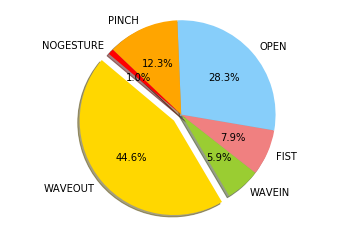

In [33]:
# Gráfica comparativa en diagrama de pastel, destacando a WAVEOUT, que abarca más datos.
labels = 'WAVEOUT', 'WAVEIN', 'FIST','OPEN','PINCH','NOGESTURE'
sizes = Ms1_summary
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'red']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [14]:
# Valor medio en sensor 4 "WMoos_F5_Ms4" 

# Gesto "WAVEOUT"
Ms4_waveOut        = emgSensorFour[0:50]
Ms4_waveOut_mean   = np.mean(Ms4_waveOut)
print(Ms4_waveOut_mean)

# Gesto "WAVEIN"
Ms4_waveIn        = emgSensorFour[50:100]
Ms4_waveIn_mean   = np.mean(Ms4_waveIn)
print(Ms4_waveIn_mean)

# Gesto "FIST"
Ms4_fist        = emgSensorFour[100:150]
Ms4_fist_mean   = np.mean(Ms4_fist)
print(Ms4_fist_mean)

# Gesto "OPEN"
Ms4_open        = emgSensorFour[150:200]
Ms4_open_mean   = np.mean(Ms4_open )
print(Ms4_open_mean)

# Gesto "PINCH"
Ms4_pinch        = emgSensorFour[200:250]
Ms4_pinch_mean   = np.mean(Ms4_pinch)
print(Ms4_pinch_mean)


# Gesto "NOGESTURE"
Ms4_noGesture        = emgSensorFour[250:300]
Ms4_noGesture_mean   = np.mean(Ms4_noGesture)
print(Ms4_noGesture_mean)

1.6110205078400002
4.03719299314
0.49891662600000003
0.8442321777200003
0.4444671631200001
0.021368408199999994


In [15]:
Ms4_summary=[Ms4_waveOut_mean,Ms4_waveIn_mean,Ms4_fist_mean,Ms4_open_mean,Ms4_pinch_mean,Ms4_noGesture_mean]
print(Ms4_summary)

[1.6110205078400002, 4.03719299314, 0.49891662600000003, 0.8442321777200003, 0.4444671631200001, 0.021368408199999994]


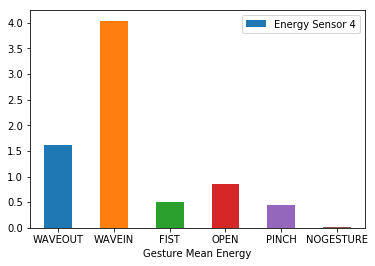

In [16]:
# Gráficas comparativas del valor medio por gesto en el sensor 4 "WMoos_F5_Ms4" 

df = pd.DataFrame({'Gesture Mean Energy':['WAVEOUT', 'WAVEIN', 'FIST','OPEN','PINCH','NOGESTURE'], 
                   'Energy Sensor 4':Ms4_summary})
ax = df.plot.bar(x='Gesture Mean Energy', y='Energy Sensor 4', rot=0)

### Comparacion de graficas

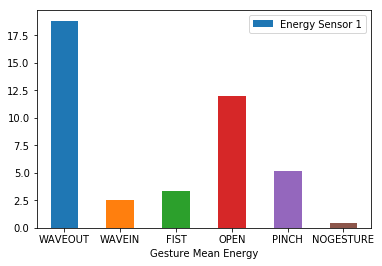

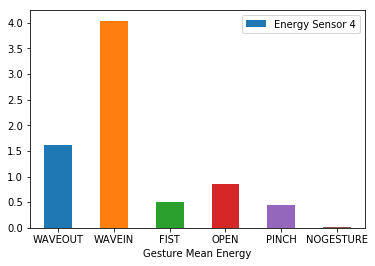

In [34]:
# Gráficas comparativas del valor medio por gesto en el sensor 1 "WMoos_F5_Ms1" 

df = pd.DataFrame({'Gesture Mean Energy':['WAVEOUT', 'WAVEIN', 'FIST','OPEN','PINCH','NOGESTURE'], 
                   'Energy Sensor 1':Ms1_summary})
ax = df.plot.bar(x='Gesture Mean Energy', y='Energy Sensor 1', rot=0)

# Gráficas comparativas del valor medio por gesto en el sensor 4 "WMoos_F5_Ms4" 

df = pd.DataFrame({'Gesture Mean Energy':['WAVEOUT', 'WAVEIN', 'FIST','OPEN','PINCH','NOGESTURE'], 
                   'Energy Sensor 4':Ms4_summary})
ax = df.plot.bar(x='Gesture Mean Energy', y='Energy Sensor 4', rot=0)

### Gráficos de registro EMG

In [18]:
path = "./EmgGesturesRAW.csv"
emgGestures_raw = pd.read_csv(path)

In [19]:
# WAVE OUT EMG RAW GESTURE
emgGestures_raw_s1= emgGestures_raw["S1"]
emgGestures_raw_s4= emgGestures_raw["S4"]

Text(0,0.5,'EMG Amplitude')

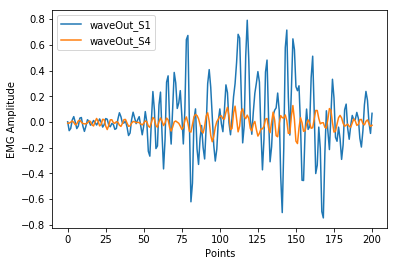

In [20]:
plt.plot(emgGestures_raw_s1)
plt.plot(emgGestures_raw_s4)
plt.legend(["waveOut_S1","waveOut_S4"])
plt.xlabel("Points")
plt.ylabel("EMG Amplitude")


In [21]:
# WAVE IN EMG RAW GESTURE
emgGestures_raw_s1= emgGestures_raw["s1"]
emgGestures_raw_s4= emgGestures_raw["s4"]

Text(0,0.5,'EMG Amplitude')

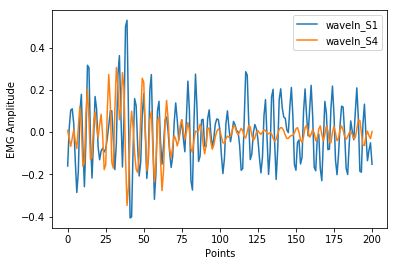

In [22]:
plt.plot(emgGestures_raw_s1)
plt.plot(emgGestures_raw_s4)
plt.legend(["waveIn_S1","waveIn_S4"])
plt.xlabel("Points")
plt.ylabel("EMG Amplitude")

In [23]:
# FIST EMG RAW GESTURE
emgGestures_raw_s1= emgGestures_raw["ss1"]
emgGestures_raw_s4= emgGestures_raw["ss4"]

Text(0,0.5,'EMG Amplitude')

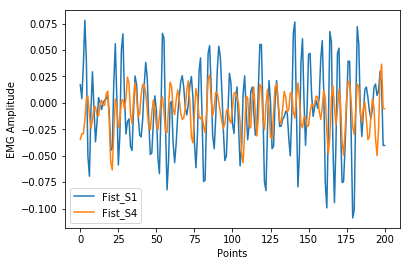

In [24]:
plt.plot(emgGestures_raw_s1)
plt.plot(emgGestures_raw_s4)
plt.legend(["Fist_S1","Fist_S4"])
plt.xlabel("Points")
plt.ylabel("EMG Amplitude")

### Las gráficas representan el registro hecho por el brazalete MYO
Las conclusiones que podemos obtener de este breve análisis son:
- La señal EMG del gesto waveOut presenta mayor amplitud en el sensor 1
- La señal EMG del gesto waveIn presenta mayor amplitud en el sensor 4
- La señal EMG del gesto noGesture presenta menor amplitud en todos los sensores

Utilizando la energia calculada asi como la desviacion estándar y la media, podemos dar una breve conclusión.

- Si un gesto registra mayor energia en el sensor 1 el gesto sera WAVEOUT
- Si un gesto registra mayor energia en el sensor 4 el gesto sera WAVEIN

Este simple control nos permite manejar varios dispositivos electrónicos.



 
 ![Myo]( http://routenote.com/blog/wp-content/uploads/2016/01/Myo-armband.png)
 
